In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = 'data/Digit_train.csv'
df = pd.read_csv(data)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.drop(columns=['label'])
y = df['label']
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, stratify=y)
print(x_train.shape)
print(x_test.shape)

(29400, 784)
(12600, 784)


In [5]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [6]:
trained = model.predict(x_train)
predicted = model.predict(x_test)

# get the accuracy
print (accuracy_score(y_train, trained))
print (accuracy_score(y_test, predicted))

0.9770408163265306
0.9618253968253968


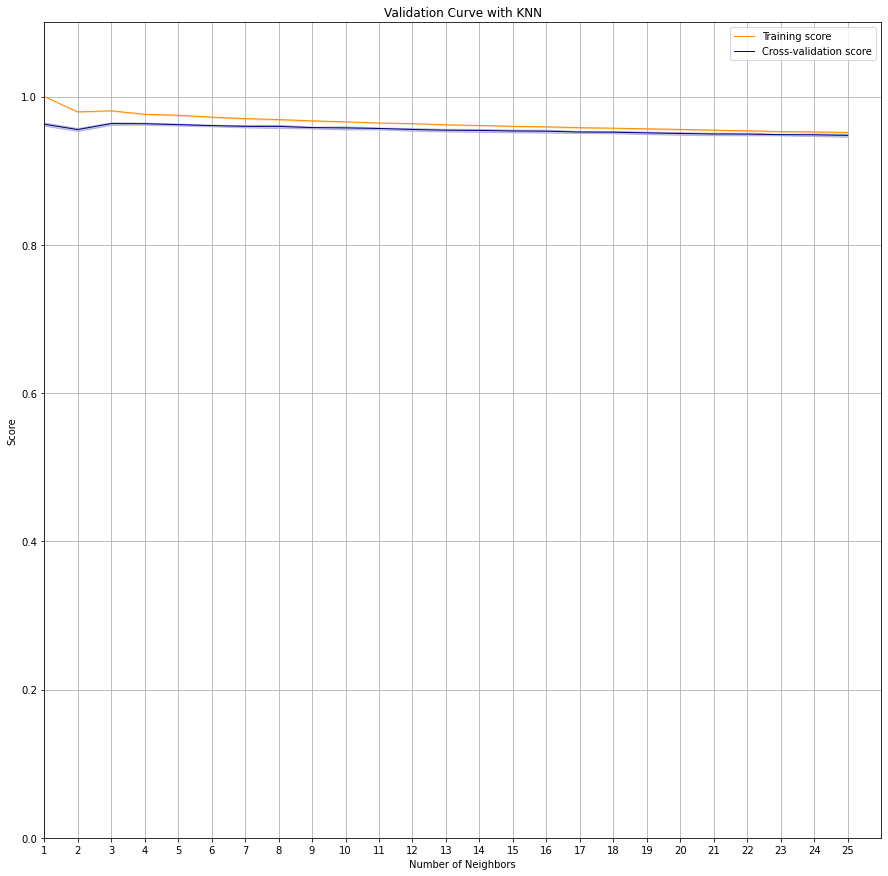

In [7]:
param_range = np.arange(1,26,1)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    x_train,
    y_train,
    param_name="n_neighbors",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize = (15,15))
plt.title("Validation Curve with KNN")
plt.xlabel('Number of Neighbors')
plt.ylabel("Score")
plt.xlim(1,26)
plt.xticks(np.arange(1,26,1))
plt.ylim(0.0, 1.1)
lw = 1

plt.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
#plt.semilogx(
    #param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
#)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

plt.plot(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
#plt.semilogx(
    #param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
#)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.grid()
plt.show()

### We will use n_neighbors = 3 and try to tune the P value Hyperparameter, p = 1 equivalent to using manhattan_distance (l1) while p = 2 is equivalent to using euclidean_distance (l2)

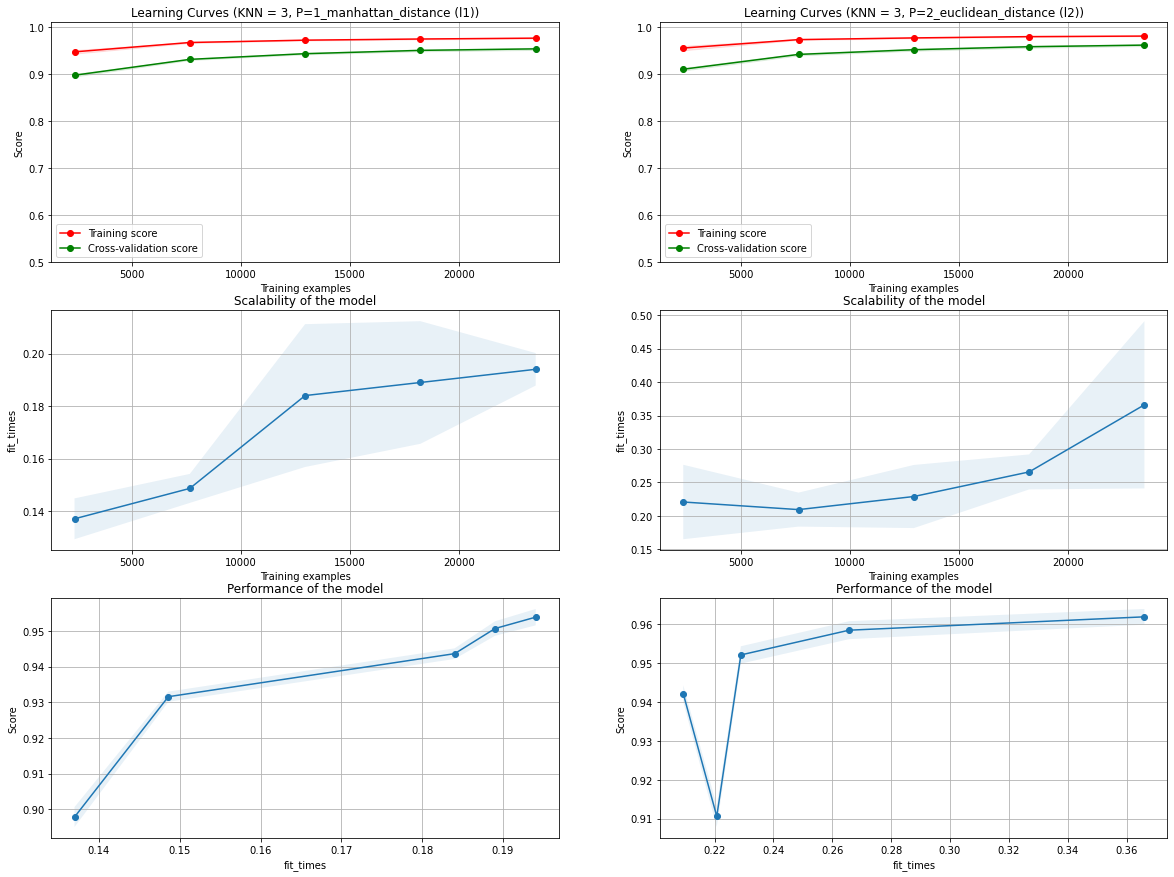

In [7]:
#predicted = model.predict(x_test)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        x_train,
        y_train,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(20, 15))


title = r"Learning Curves (KNN = 3, P=1_manhattan_distance (l1))"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors = 3, p=1)
plot_learning_curve(
    estimator, title, x_train, y_train, axes=axes[:, 0], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (KNN = 3, P=2_euclidean_distance (l2))"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors = 3, p=2)
plot_learning_curve(
    estimator, title, x_train, y_train, axes=axes[:, 1], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

plt.show()

In [12]:
model_tuned = KNeighborsClassifier(n_neighbors = 3, p=2, weights = 'distance')
model_tuned.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [13]:
from sklearn.metrics import classification_report
predicted_tuned = model_tuned.predict(x_test)
report = classification_report(y_test, predicted_tuned)
print (accuracy_score(y_test, predicted_tuned))
print(report)

0.9638095238095238
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1240
           1       0.95      1.00      0.97      1405
           2       0.99      0.94      0.96      1253
           3       0.96      0.96      0.96      1305
           4       0.98      0.95      0.97      1222
           5       0.96      0.95      0.95      1139
           6       0.98      0.99      0.98      1241
           7       0.95      0.97      0.96      1320
           8       0.98      0.93      0.96      1219
           9       0.93      0.95      0.94      1256

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600

